In [14]:
!pip install gdcm
!pip install pylibjpeg
!pip install pylibjpeg-libjpeg

     |████████████████████████████████| 4.3 MB 22.8 MB/s eta 0:00:01


In [24]:
!pip install seaborn

     |████████████████████████████████| 292 kB 21.3 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np

from fastai.imports import *
from fastai.medical.imaging import *

In [25]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [4]:
metadata = pd.read_json('Covid Data/MIDRC_CT_Scan_metadata.json')

In [5]:
metadata

,submitter_id,_ct_series_count,_ct_instances_count,study_modality,study_description,age_at_imaging,study_year,study_year_shifted,body_part_examined,covid19_positive,...,image_type,lossy_image_compression,manufacturer,manufacturer_model_name,modality,pixel_spacing,series_description,series_uid,spatial_resolution,project_id
0,1.2.826.0.1.3680043.10.474.954795.7902,1,87,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.7903],[],TCIA-RICORD-1b
1,1.2.826.0.1.3680043.10.474.660042.1825,1,203,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.1826],[],TCIA-RICORD-1a
2,1.2.826.0.1.3680043.10.474.660042.44037,1,215,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.44038],[],TCIA-RICORD-1b
3,1.2.826.0.1.3680043.10.474.954795.12326,1,89,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.12327],[],TCIA-RICORD-1b
4,1.2.826.0.1.3680043.10.474.660042.48940,1,235,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.48941],[],TCIA-RICORD-1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.10.474.660042.53481,1,240,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.53482],[],TCIA-RICORD-1b
83,1.2.826.0.1.3680043.10.474.660042.29997,1,210,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.29998],[],TCIA-RICORD-1a
84,1.2.826.0.1.3680043.10.474.419639.691275247246505254912386946200,8,1159,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,"[None, None, None, None]",[],[],[],[CT],"[None, None, None, None, None, None, None, None]","[0.625mm Detail alg, 2.5mm IODINE(WATER), SAG 3X3, PE SCOUT, 1.25 60 KEV, COR 3X3]","[1.2.826.0.1.3680043.10.474.419639.333446818289534784821016786497, 1.2.826.0.1.3680043.10.474.419639.131594059060712105947414811831, 1.2.826.0.1.3680043.10.474.419639.224881984079070203677867208017, 1.2.826.0.1.3680043.10.474.419639.455408098998889976505939918451, 1.2.826.0.1.3680043.10.474.419639.195631182822445808945792598003, 1.2.826.0.1.3680043.10.474.419639.259384151105891625275828843298, 1.2.826.0.1.3680043.10.474.419639.113869758149514128057672769058, 1.2.826.0.1.3680043.10.474.419639.166011720264886300637357651165]",[],TCIA-RICORD-1a
85,1.2.826.0.1.3680043.10.474.954795.7731,1,89,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[None],[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.7732],[],TCIA-RICORD-1b


In [6]:
metadata.columns

Index(['submitter_id', '_ct_series_count', '_ct_instances_count',
       'study_modality', 'study_description', 'age_at_imaging', 'study_year',
       'study_year_shifted', 'body_part_examined', 'covid19_positive',
       'age_at_index', 'index_event', 'sex', 'race', 'zip', 'data_format',
       'acquisition_type', 'convolution_kernel', 'exposure_modulation_type',
       'patient_position', 'slice_thickness', 'spacing_between_slices',
       'contrast_bolus_agent', 'image_type', 'lossy_image_compression',
       'manufacturer', 'manufacturer_model_name', 'modality', 'pixel_spacing',
       'series_description', 'series_uid', 'spatial_resolution', 'project_id'],
      dtype='object')

In [49]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   submitter_id              87 non-null     object 
 1   _ct_series_count          87 non-null     int64  
 2   _ct_instances_count       87 non-null     int64  
 3   study_modality            87 non-null     object 
 4   study_description         0 non-null      float64
 5   age_at_imaging            0 non-null      float64
 6   study_year                0 non-null      float64
 7   study_year_shifted        0 non-null      float64
 8   body_part_examined        87 non-null     object 
 9   covid19_positive          0 non-null      float64
 10  age_at_index              0 non-null      float64
 11  index_event               0 non-null      float64
 12  sex                       0 non-null      float64
 13  race                      0 non-null      float64
 14  zip         

In [7]:
metadata['Result'] = 'Positive'

In [8]:
#dataset a is covid positive
metadata['Result'] = np.where((metadata['project_id'] == 'TCIA-RICORD-1b'),'Negative',metadata['Result'])
metadata

,submitter_id,_ct_series_count,_ct_instances_count,study_modality,study_description,age_at_imaging,study_year,study_year_shifted,body_part_examined,covid19_positive,...,lossy_image_compression,manufacturer,manufacturer_model_name,modality,pixel_spacing,series_description,series_uid,spatial_resolution,project_id,Result
0,1.2.826.0.1.3680043.10.474.954795.7902,1,87,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.7903],[],TCIA-RICORD-1b,Negative
1,1.2.826.0.1.3680043.10.474.660042.1825,1,203,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.1826],[],TCIA-RICORD-1a,Positive
2,1.2.826.0.1.3680043.10.474.660042.44037,1,215,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.44038],[],TCIA-RICORD-1b,Negative
3,1.2.826.0.1.3680043.10.474.954795.12326,1,89,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.12327],[],TCIA-RICORD-1b,Negative
4,1.2.826.0.1.3680043.10.474.660042.48940,1,235,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.48941],[],TCIA-RICORD-1b,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.2.826.0.1.3680043.10.474.660042.53481,1,240,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.53482],[],TCIA-RICORD-1b,Negative
83,1.2.826.0.1.3680043.10.474.660042.29997,1,210,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[],[1.2.826.0.1.3680043.10.474.660042.29998],[],TCIA-RICORD-1a,Positive
84,1.2.826.0.1.3680043.10.474.419639.691275247246505254912386946200,8,1159,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],"[None, None, None, None, None, None, None, None]","[0.625mm Detail alg, 2.5mm IODINE(WATER), SAG 3X3, PE SCOUT, 1.25 60 KEV, COR 3X3]","[1.2.826.0.1.3680043.10.474.419639.333446818289534784821016786497, 1.2.826.0.1.3680043.10.474.419639.131594059060712105947414811831, 1.2.826.0.1.3680043.10.474.419639.224881984079070203677867208017, 1.2.826.0.1.3680043.10.474.419639.455408098998889976505939918451, 1.2.826.0.1.3680043.10.474.419639.195631182822445808945792598003, 1.2.826.0.1.3680043.10.474.419639.259384151105891625275828843298, 1.2.826.0.1.3680043.10.474.419639.113869758149514128057672769058, 1.2.826.0.1.3680043.10.474.419639.166011720264886300637357651165]",[],TCIA-RICORD-1a,Positive
85,1.2.826.0.1.3680043.10.474.954795.7731,1,89,[CT],NaN,NaN,NaN,NaN,[CHEST],NaN,...,[],[],[],[CT],[None],[THORAX PE ART AXIAL 3X3],[1.2.826.0.1.3680043.10.474.954795.7732],[],TCIA-RICORD-1b,Negative


In [9]:
TEST_DCM = Path('New Data/train-Data/train/Negative/1.000000-51699-1-001.dcm')
dcm = TEST_DCM.dcmread()
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 182
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.474.660042.51898
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['ISO 2022 IR 101', 'ISO 2022 IR 100']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10.

In [10]:
dcm.pixel_array, dcm.pixel_array.shape

(array([[32, 15, 19, ..., 31, 27, 20],
        [34, 22, 19, ..., 30, 22, 18],
        [33, 33, 17, ..., 26, 22, 26],
        ...,
        [19, 50, 61, ..., 22, 22,  9],
        [35, 39, 32, ..., 12, 30, 34],
        [20, 13, 13, ..., 10,  4, 22]], dtype=uint16),
 (512, 512))

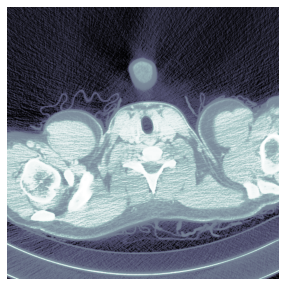

In [11]:
dcm.show()

In [12]:
path = Path('./New Data/')
scans = get_dicom_files(path)
print(len(scans))

17628


In [50]:
items_train = get_dicom_files('./New Data/train-Data')
items_test = get_dicom_files('./New Data/test-Data')
items = items_train + items_test

In [51]:
dicom_dataframe = pd.DataFrame.from_dicoms(items)

In [56]:
print(len(dicom_dataframe.columns))

140


In [52]:
for x in dicom_dataframe.columns:
    print(x)

SpecificCharacterSet
MultiImageType
ImageType
ImageType1
ImageType2
ImageType3
SOPClassUID
SOPInstanceUID
StudyDate
SeriesDate
AcquisitionDate
ContentDate
AcquisitionDateTime
StudyTime
SeriesTime
AcquisitionTime
ContentTime
AccessionNumber
Modality
Manufacturer
ReferringPhysicianName
PatientName
PatientID
PatientBirthDate
PatientSex
DeidentificationMethod
MultiDeidentificationMethodCodeSequence
DeidentificationMethodCodeSequence
DeidentificationMethodCodeSequence1
DeidentificationMethodCodeSequence2
DeidentificationMethodCodeSequence3

BodyPartExamined
SliceThickness
KVP
DataCollectionDiameter
SoftwareVersions
ReconstructionDiameter
DistanceSourceToDetector
DistanceSourceToPatient
GantryDetectorTilt
TableHeight
RotationDirection
ExposureTime
XRayTubeCurrent
Exposure
FilterType
GeneratorPower
FocalSpots
ConvolutionKernel
PatientPosition
SingleCollimationWidth
TotalCollimationWidth
TableSpeed
TableFeedPerRotation
SpiralPitchFactor
DataCollectionCenterPatient
ReconstructionTargetCenterPat

In [63]:
dicom_dataframe.isna().sum(axis = 0).sort_values(ascending = False)[0:20]

NominalPercentageOfCardiacPhase         17473
ContrastBolusIngredientConcentration    17429
ContrastBolusTotalDose                  17429
PatientWeight                           17355
PatientSize                             17355
ImageType6                              16935
ImageType5                              16935
ImageType4                              16935
SpecificCharacterSet1                   16458
MultiSpecificCharacterSet               16458
ContrastBolusVolume                     14434
NumberOfStudyRelatedInstances           14428
FocalSpots1                             12871
MultiFocalSpots                         12871
ContrastBolusRoute                      11884
ContrastBolusAgent                      11685
PixelPaddingValue                       11223
RevolutionTime                          11223
SpacingBetweenSlices                    11217
MultiConvolutionKernel                  10776
dtype: int64

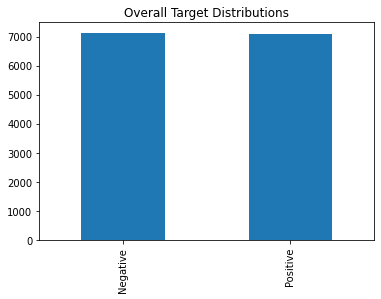

In [18]:
y1=pd.Series(data=items_train)
y1=y1.apply(lambda x: str(x).split('/')[-2])
y1.value_counts().plot.bar()
plt.title('Training Distributions')
plt.show()

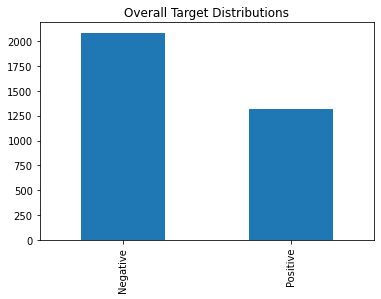

In [19]:
y2=pd.Series(data=items_test)
y2=y2.apply(lambda x: str(x).split('/')[-2])
y2.value_counts().plot.bar()
plt.title('Testing Distributions')
plt.show()

In [21]:
metadata['Result'].value_counts()

Negative    54
Positive    33
Name: Result, dtype: int64

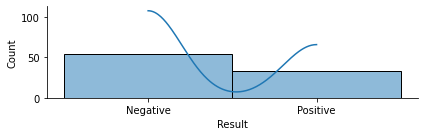

In [26]:
sns.displot(data=metadata, x="Result", kde=True, height=2, aspect=3);

In [27]:
type(dcm)

pydicom.dataset.FileDataset

In [28]:
dcm.pixels

tensor([[32., 15., 19.,  ..., 31., 27., 20.],
        [34., 22., 19.,  ..., 30., 22., 18.],
        [33., 33., 17.,  ..., 26., 22., 26.],
        ...,
        [19., 50., 61.,  ..., 22., 22.,  9.],
        [35., 39., 32.,  ..., 12., 30., 34.],
        [20., 13., 13.,  ..., 10.,  4., 22.]])

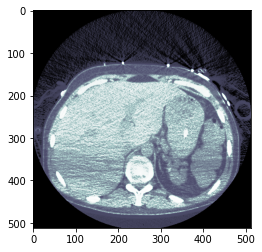

In [64]:
data_scaled = dcm.hist_scaled()
plt.imshow(data_scaled, cmap=plt.cm.bone);

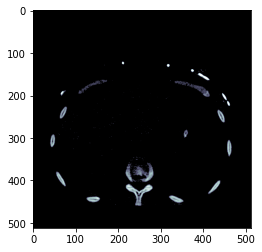

In [65]:
data_scaled = dcm.hist_scaled(min_px=100, max_px=1000)
plt.imshow(data_scaled, cmap=plt.cm.bone);

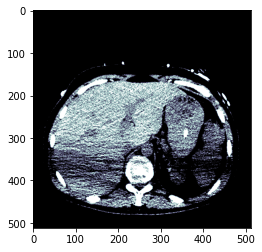

In [66]:
plt.imshow(dcm.windowed(*dicom_windows.brain), cmap=plt.cm.bone);

/opt/conda/lib/python3.7/site-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)


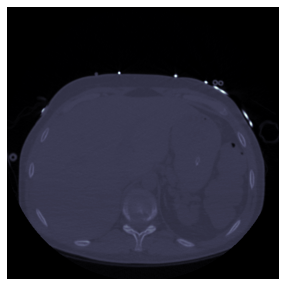

In [67]:
tensor_ct = TensorCTScan(dcm.pixel_array)
tensor_ct.show();

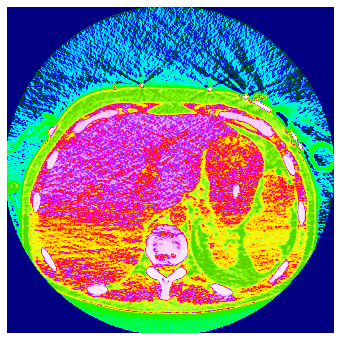

In [68]:
dcm.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

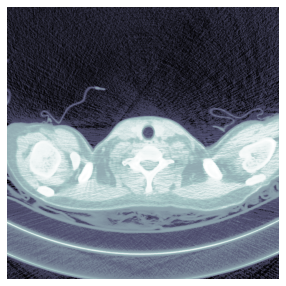

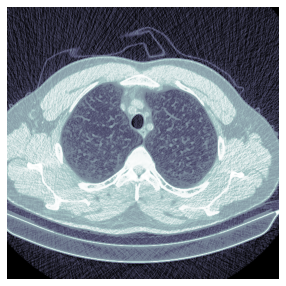

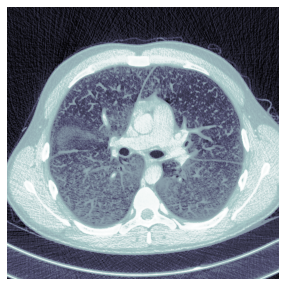

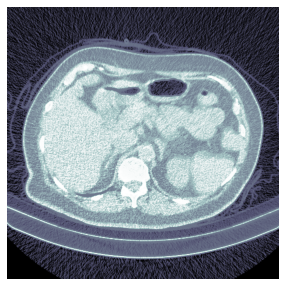

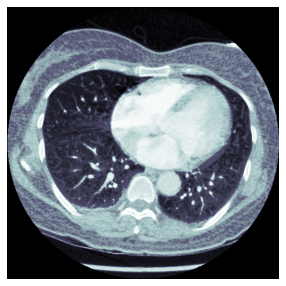

In [69]:
import random

rand = random.sample(items_train, 5)
for x in rand:
    dcm = x.dcmread()
    dcm.show()